**YOLOv8** é um novo modelo de visão computacional de útlima geração construído pela Ultralytics. O modelo Yolov8 contém suporte pronto para uso para tarefas de detecção, classificação e segmentação de objetos, acessível por meio de um pacote Python, bem como uma interface de linha de comando.

Instalação dos pacotes e bibliotecas do YOLOv8

In [1]:
# Instalando a biblioteca do YOLOv8
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.5/616.5 kB 9.5 MB/s eta 0:00:00


In [2]:
# Importando o pacote ultralytics
# É necessário fazer o pip install anterior pq não vem instalado nocolab
import ultralytics

In [3]:
# Importando o pacote Pytorch
import torch

In [4]:
# Importando as demais bibliotecas
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
from google.colab.patches import cv2_imshow

## Realizando a detecção

A forma mais rápida de executar a deteçcão é através da CLI, conforme pode ver abaixo a sintaxe.

Os parâmetros:
* **task** - tarefa, podendo ser detecção, segmentação ou classificação
* **model** - o modelo que queremos usar. São disponibilizados 5 modelos: YOLOv8n (nano), YOLOv8s (small), YOLOv8m (medium), YOLOv8l (large), YOLOv8x (extra large). Nano é o mais rápido e o menor (menos pesado para rodar), enquanto que o Extra Large (YOLOv8x) é o mais preciso porém mais pesado para rodar, portanto será mais lento.
  Para o valor desse parâmetro, basta informar o nome e ao lado .pt pois é a extensão do modelo treinado em pytorch.

* **mode** - basicamente é o que queremos com o comando. queremos fazer a detecção/inferência/predição, portanto deixe =predict. Valores aceitos: [train, val, predict, export]

* **conf** - o limiar (threshold) que usaremos para filtrar detecções "fracas". Se a confiança estiver abaixo desse valor, não será considerada. Por padrão podemos configurar com um limiar bem baixo (ex: 0.25) e depois aumentar, caso verifique que detectou incorretamente algum objeto.  
* **source** - a imagem ou vídeo que queremos fazer a detecção.

In [5]:
# Estamos usando o NANO yolov8N
# O save true serve para garantir que vai salvar
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='/content/cachorros.jpg' save=True

100% 6.23M/6.23M [00:00<00:00, 52.9MB/s]
Ultralytics YOLOv8.0.192 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/cachorros.jpg: 448x640 3 dogs, 90.3ms
Speed: 11.7ms preprocess, 90.3ms inference, 34.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
'''
def mostrar(img):
  fig = plt.gcf()
  fig.set_size_inches(16,10)
  plt.axis('off')
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()
'''

In [ ]:
#resultado = cv2.imread('/content/runs/detect/predict/cachorros.jpg')
#mostrar(resultado)

**Importante:**
- Observe na saída da célula acima que o resultado da detecção será salvo na pasta 'runs/detect/predict/'
- Atenção ao número do 'predict' gerado para passar corretamente o nome na célula abaixo.

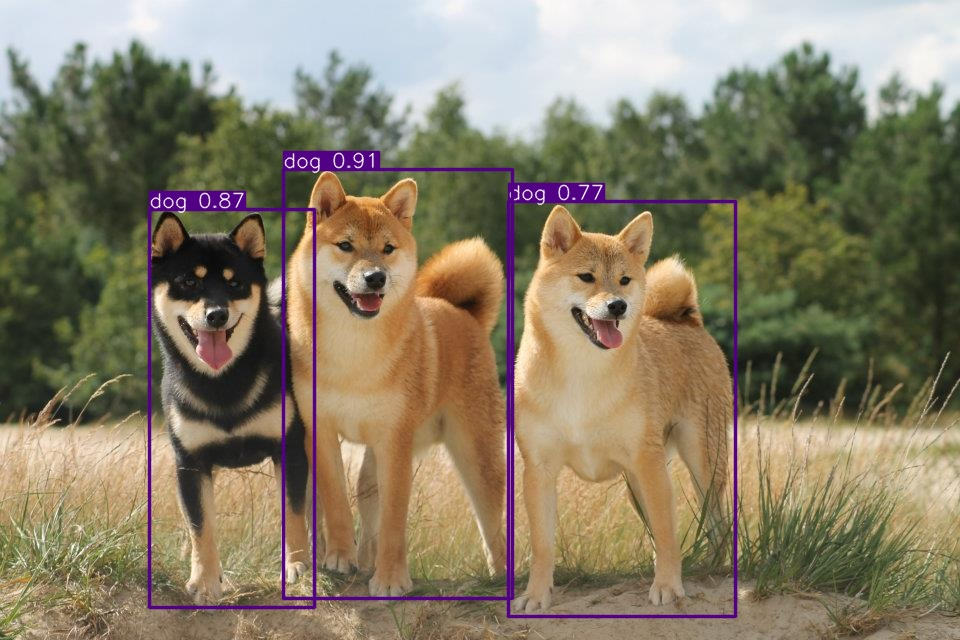

In [6]:
resultado = cv2.imread('/content/runs/detect/predict/cachorros.jpg')
cv2_imshow(resultado)

In [7]:
# Detecção a partir de arquivo externo:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://ultralytics.com/images/zidane.jpg' save=True

Ultralytics YOLOv8.0.192 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 165k/165k [00:00<00:00, 18.2MB/s]
image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 109.0ms
Speed: 2.1ms preprocess, 109.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


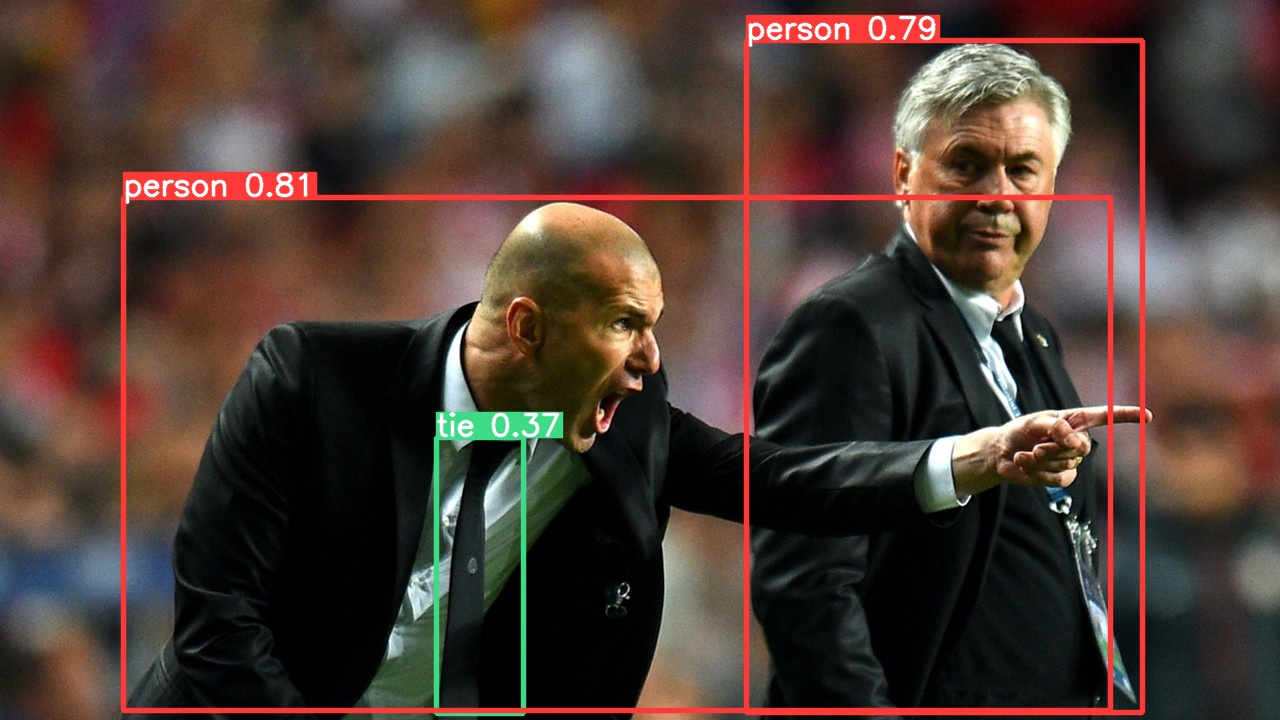

In [8]:
resultado = cv2.imread('/content/runs/detect/predict2/zidane.jpg')
cv2_imshow(resultado)

In [9]:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.4 source='italia.jpg' save=True

Ultralytics YOLOv8.0.192 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/italia.jpg: 512x640 11 persons, 1 bicycle, 1 handbag, 3 clocks, 106.1ms
Speed: 3.3ms preprocess, 106.1ms inference, 2.4ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


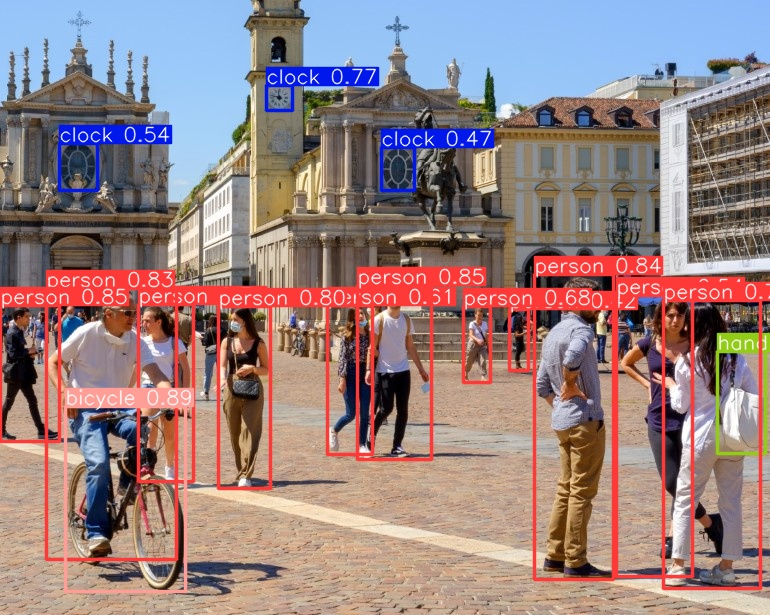

In [10]:
resultado = cv2.imread('/content/runs/detect/predict3/italia.jpg')
cv2_imshow(resultado)

In [ ]:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.57 source='italia.jpg' save=True

In [ ]:
resultado = cv2.imread('/content/runs/detect/predict4/italia.jpg')
cv2_imshow(resultado)

# Nova seção

Detecção em múltiplas imagens de uma vez

In [ ]:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.5 source='/content/imagens' save=True

In [ ]:
dir_resultados = '/content/runs/detect/predict5'

In [ ]:
caminhos = [os.path.join(dir_resultados, f) for f in os.listdir(dir_resultados)]
print(caminhos)

In [ ]:
for caminho_imagem in caminhos:
  resultado = cv2.imread(caminho_imagem)
  cv2_imshow(resultado)